In [2]:
import numpy as np
import pandas as pd

alcohol_df = pd.read_csv('alcohol_combined.csv')
marijuana_df = pd.read_csv('marijuana_combined.csv')

# combine year, month, and day columns into one date column
alcohol_df['date'] = pd.to_datetime(alcohol_df[['year', 'month', 'day']])
marijuana_df['date'] = pd.to_datetime(marijuana_df[['year', 'month', 'day']])

combined_df = pd.concat([marijuana_df, alcohol_df], ignore_index=True)
combined_df.dropna(inplace=True)

# aggregate by month
combined_df['month'] = combined_df['date'].dt.to_period('M')

ModuleNotFoundError: No module named 'numpy'

In [8]:
# Display all unique region codes (states) in the combined dataset
unique_region_codes = combined_grouped['region_code'].unique()

# Print the unique region codes
print("Unique region codes (states):")
print(unique_region_codes)

# Print the total count of unique region codes
print("Total number of unique region codes:", len(unique_region_codes))

Unique region codes (states):
['US-AK' 'US-AL' 'US-AR' 'US-AZ' 'US-CA' 'US-CO' 'US-CT' 'US-DC' 'US-DE'
 'US-FL' 'US-GA' 'US-HI' 'US-IA' 'US-ID' 'US-IL' 'US-IN' 'US-KS' 'US-KY'
 'US-LA' 'US-MA' 'US-MD' 'US-ME' 'US-MI' 'US-MN' 'US-MO' 'US-MS' 'US-MT'
 'US-NC' 'US-ND' 'US-NE' 'US-NH' 'US-NJ' 'US-NM' 'US-NV' 'US-NY' 'US-OH'
 'US-OK' 'US-OR' 'US-PA' 'US-RI' 'US-SC' 'US-SD' 'US-TN' 'US-TX' 'US-UT'
 'US-VA' 'US-VT' 'US-WA' 'US-WI' 'US-WV' 'US-WY']
Total number of unique region codes: 51


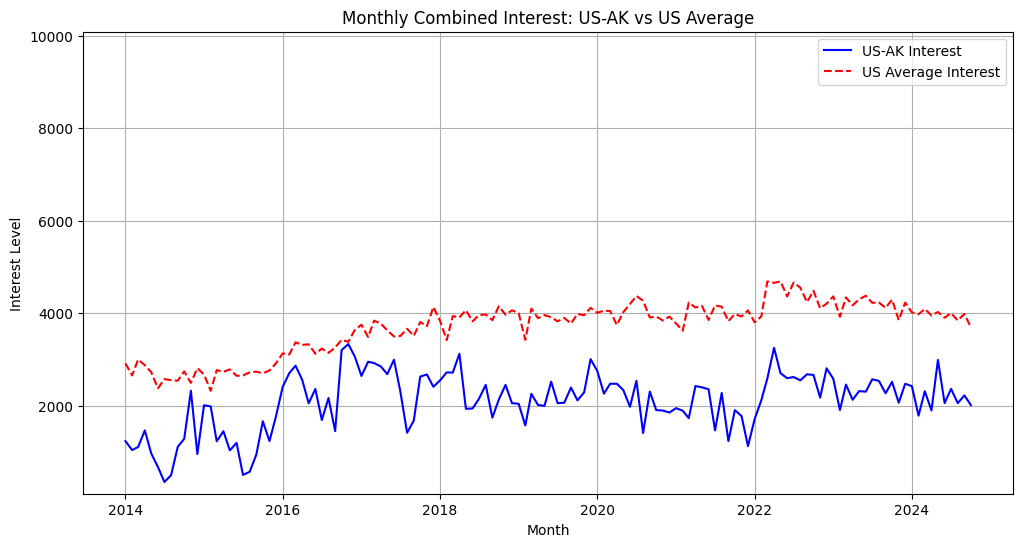

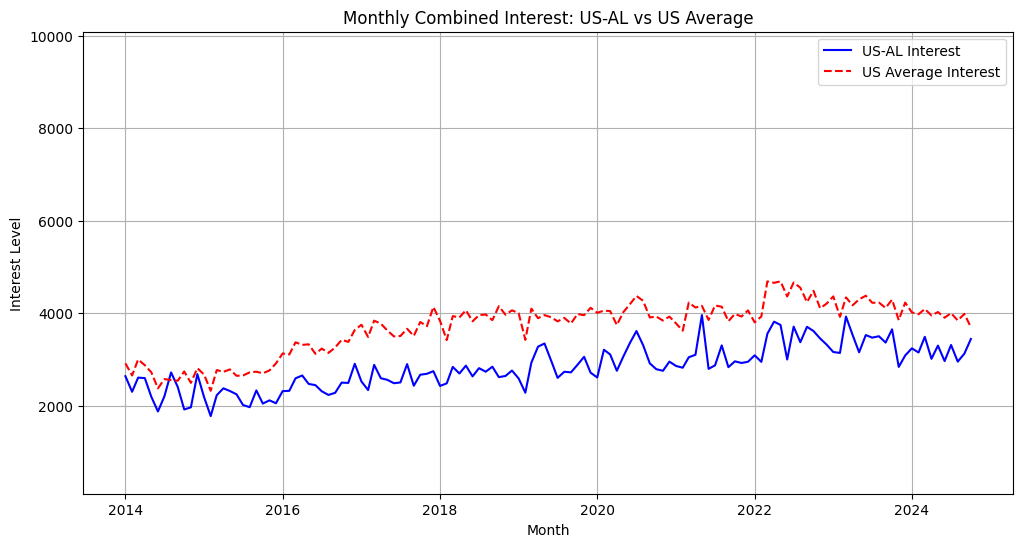

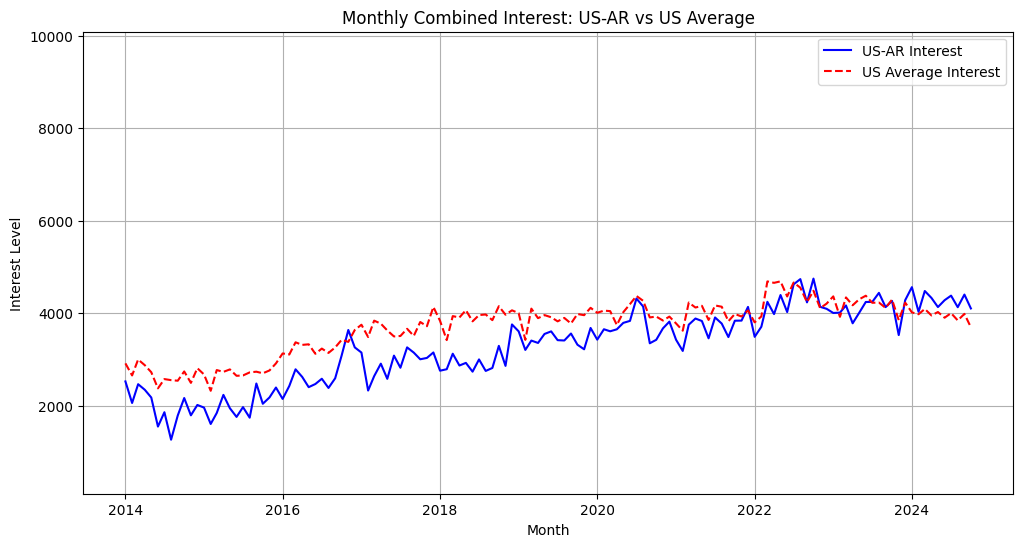

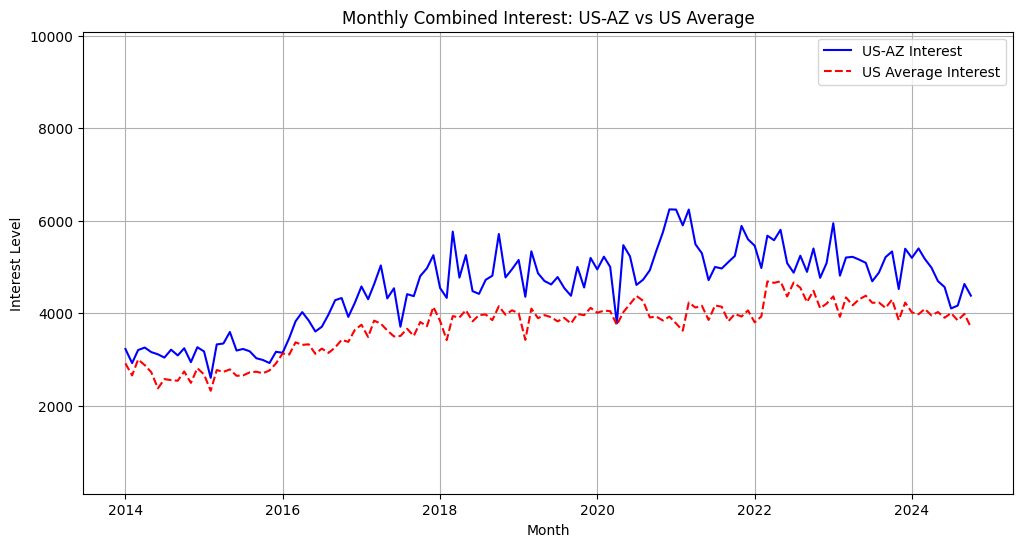

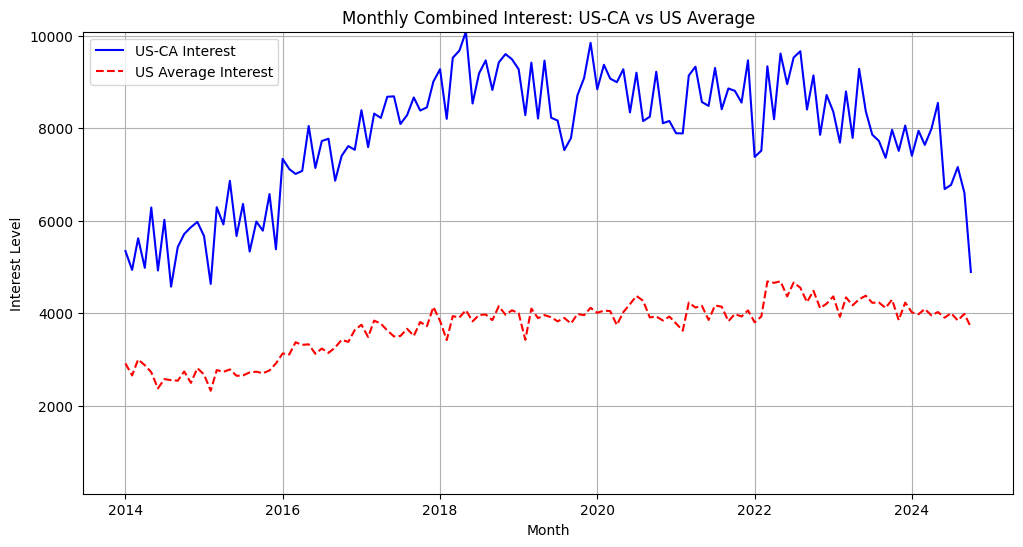

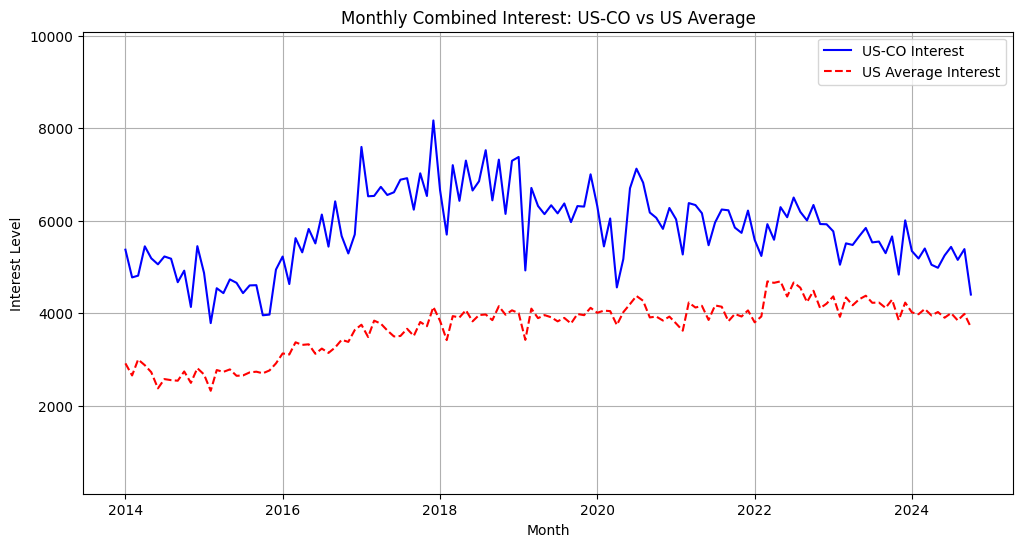

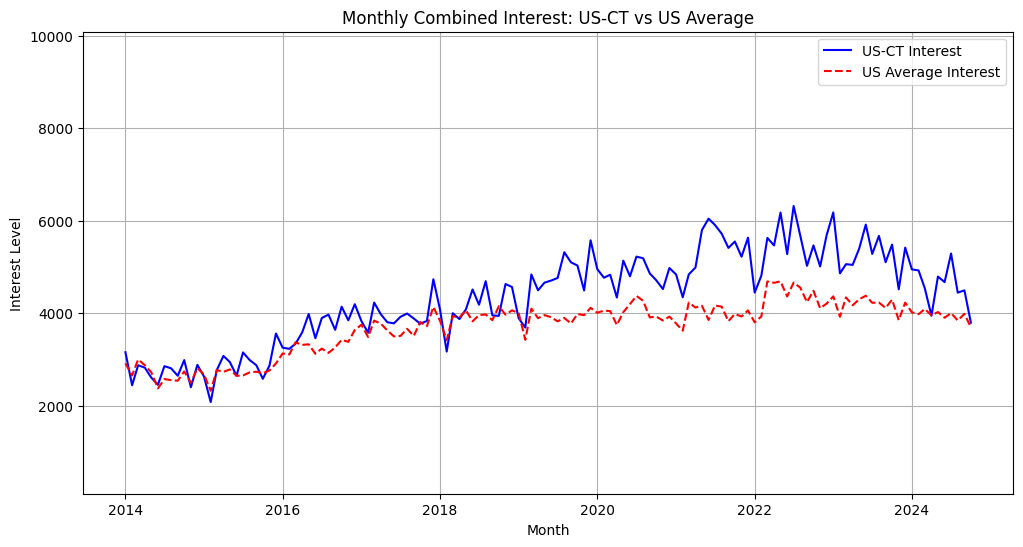

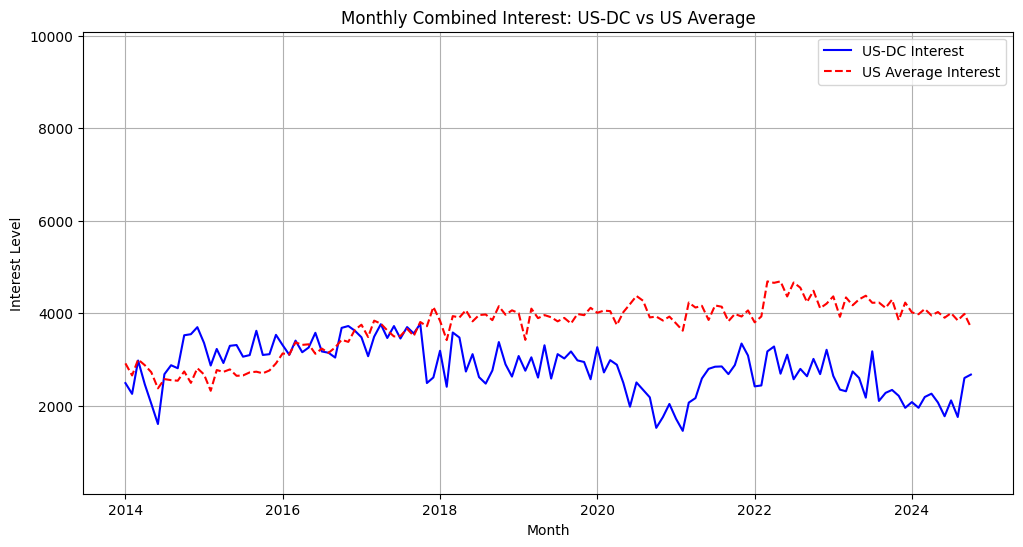

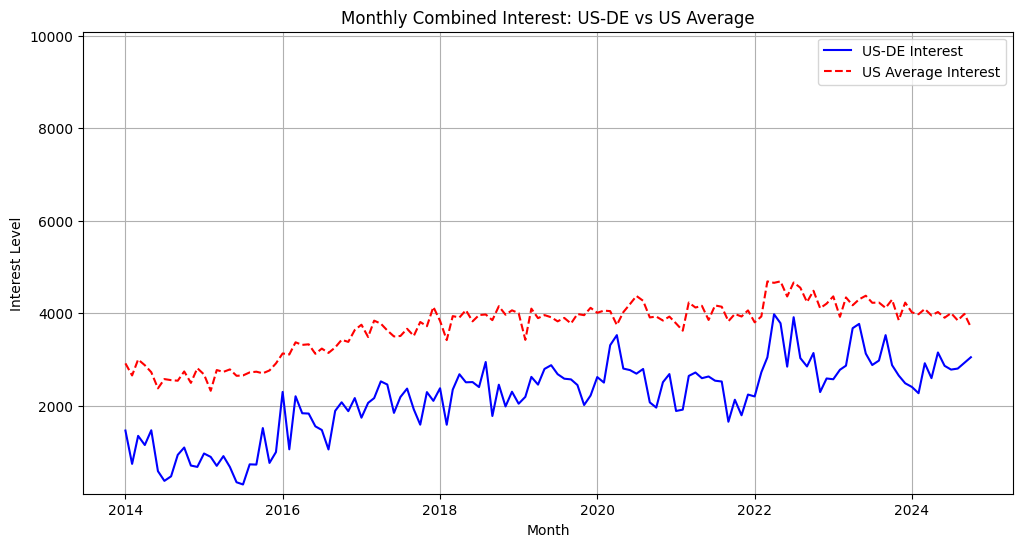

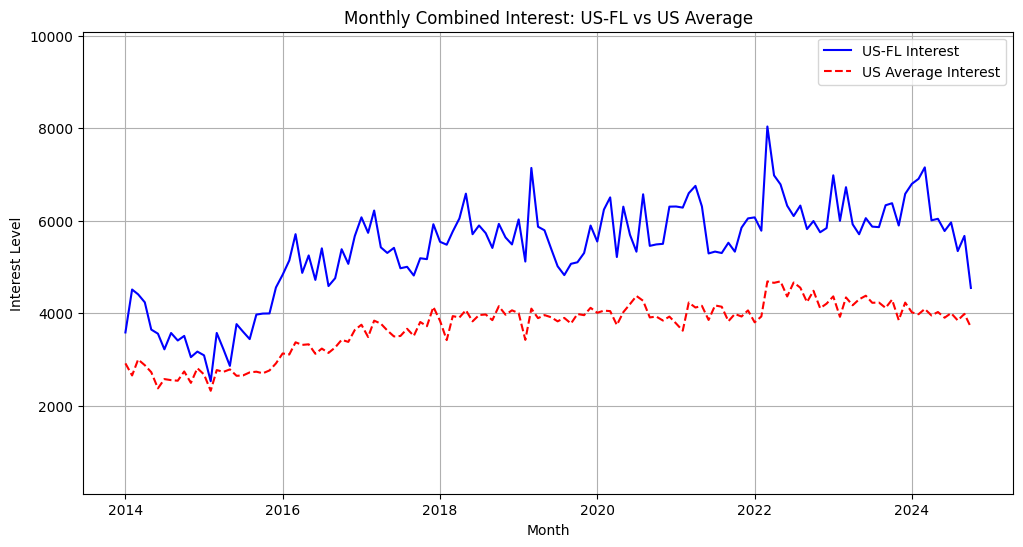

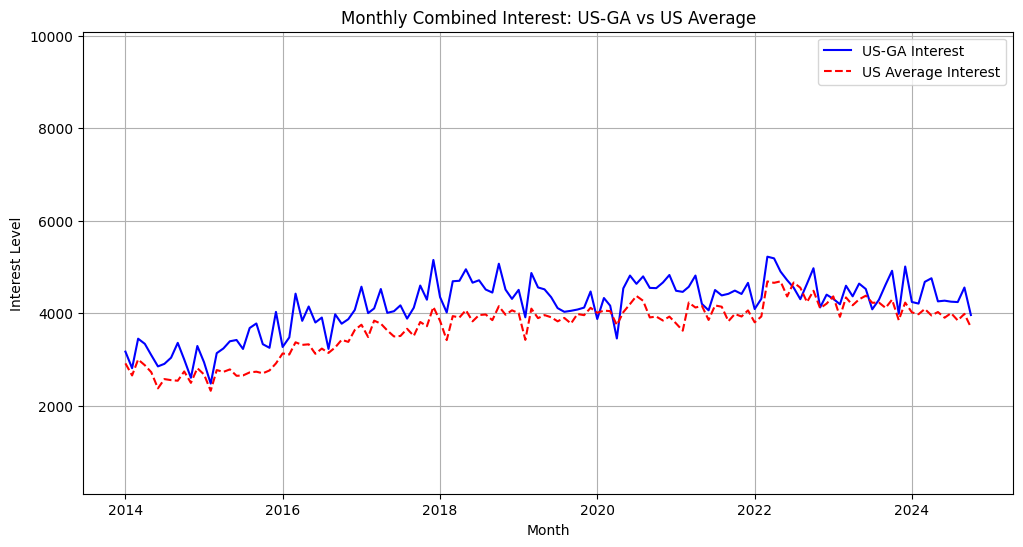

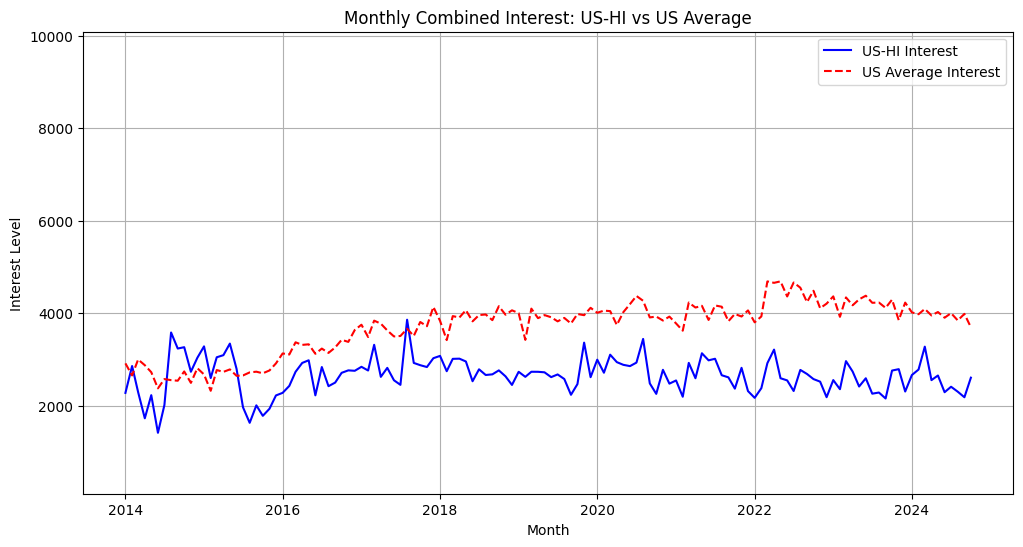

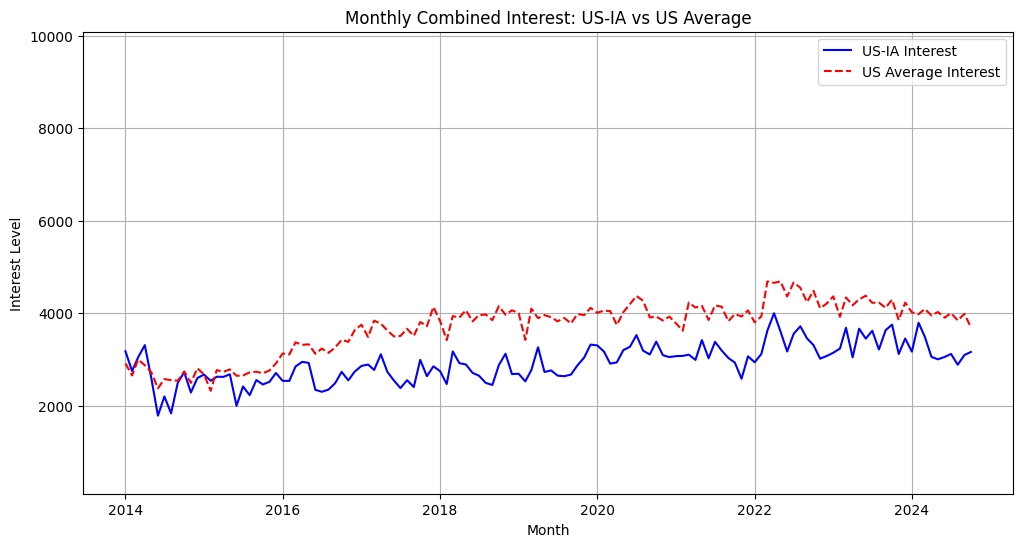

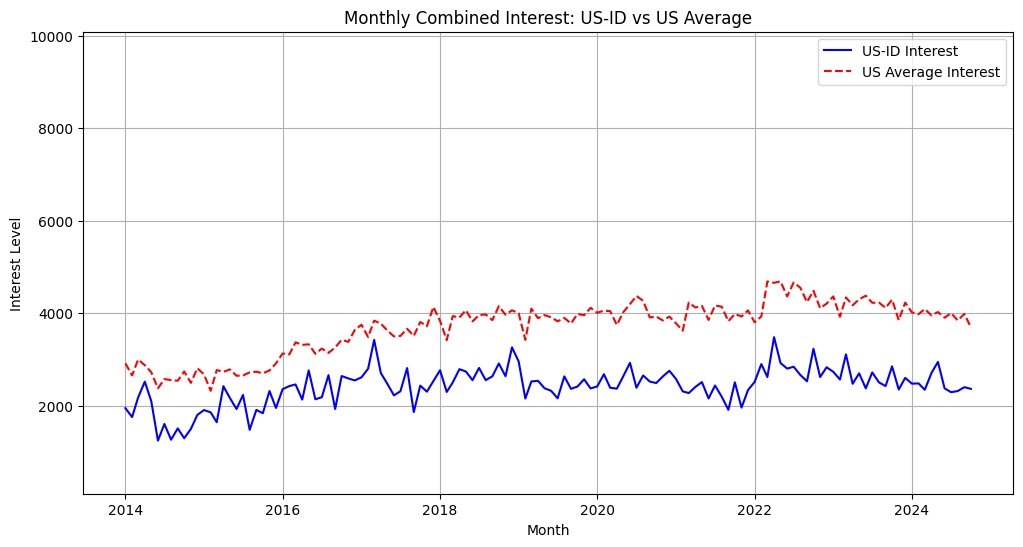

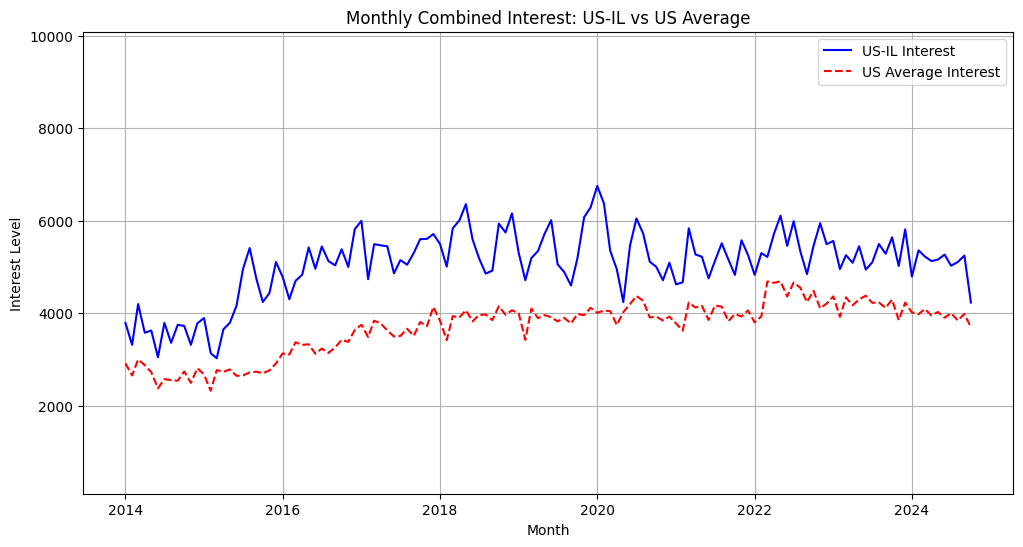

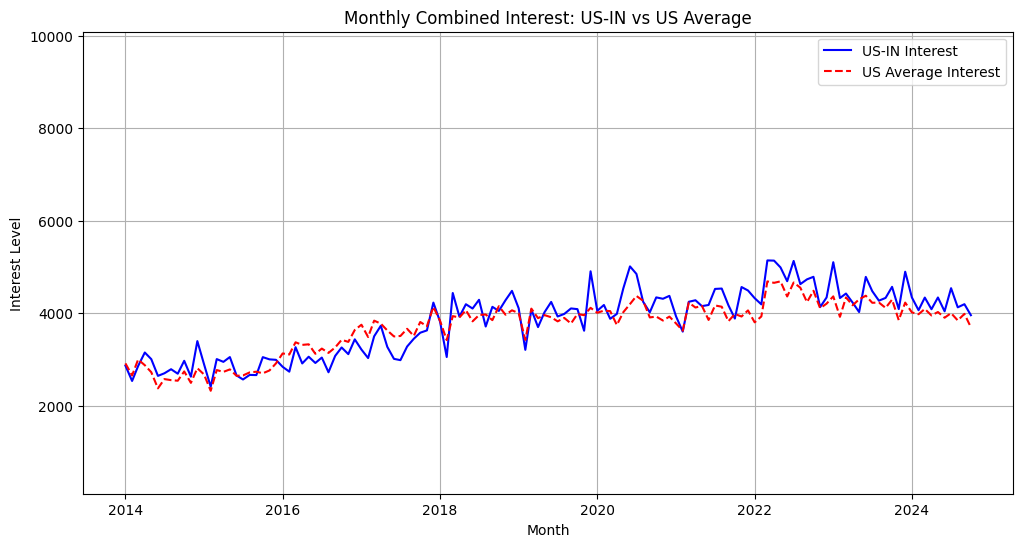

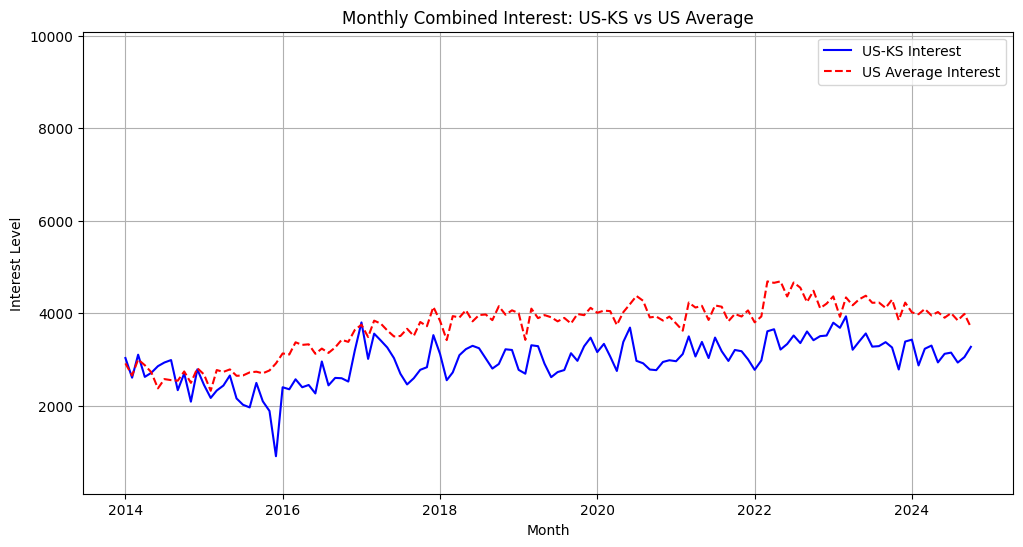

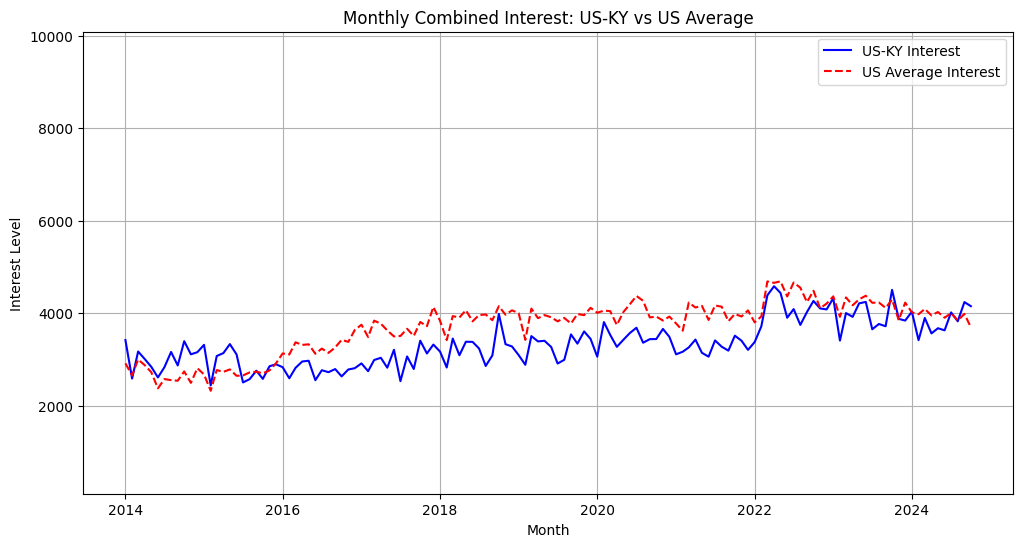

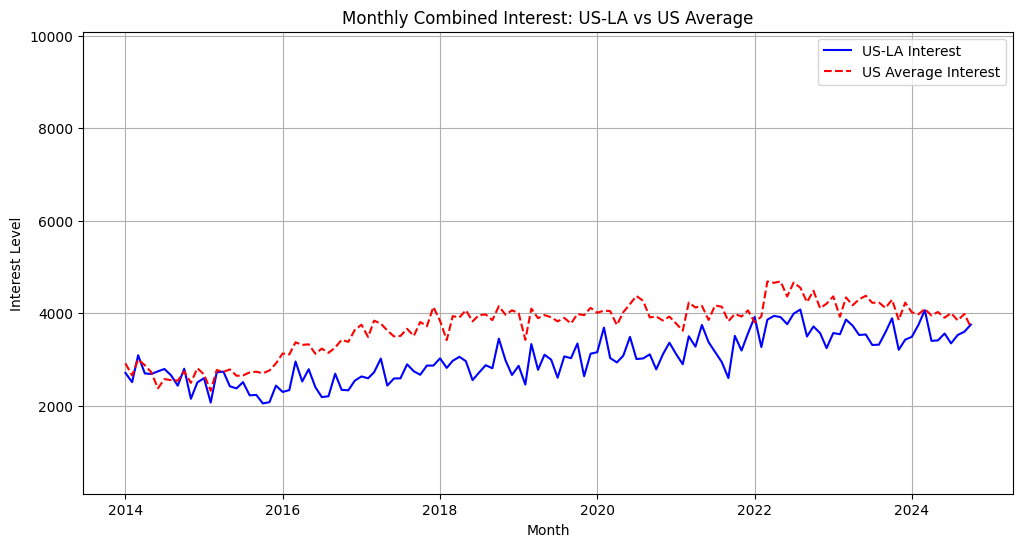

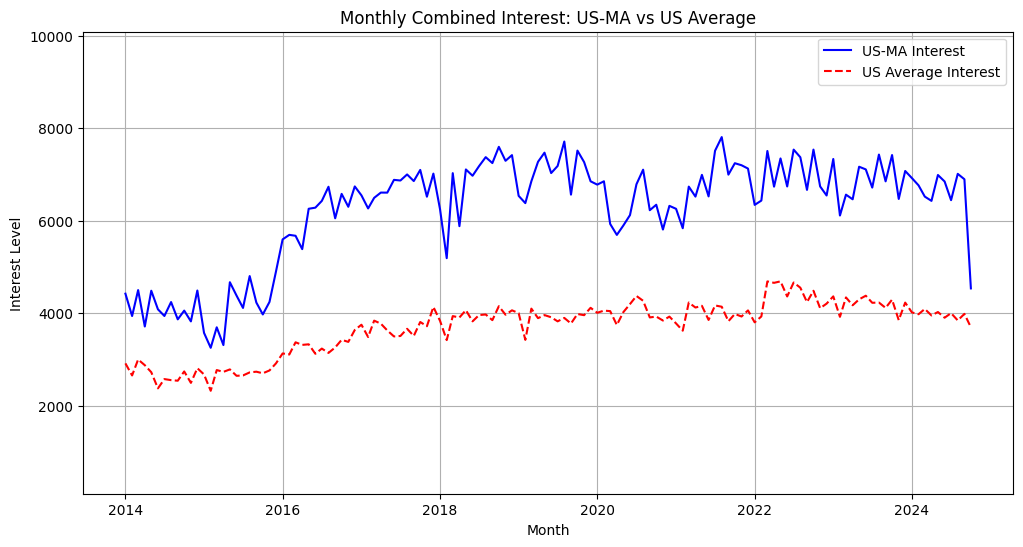

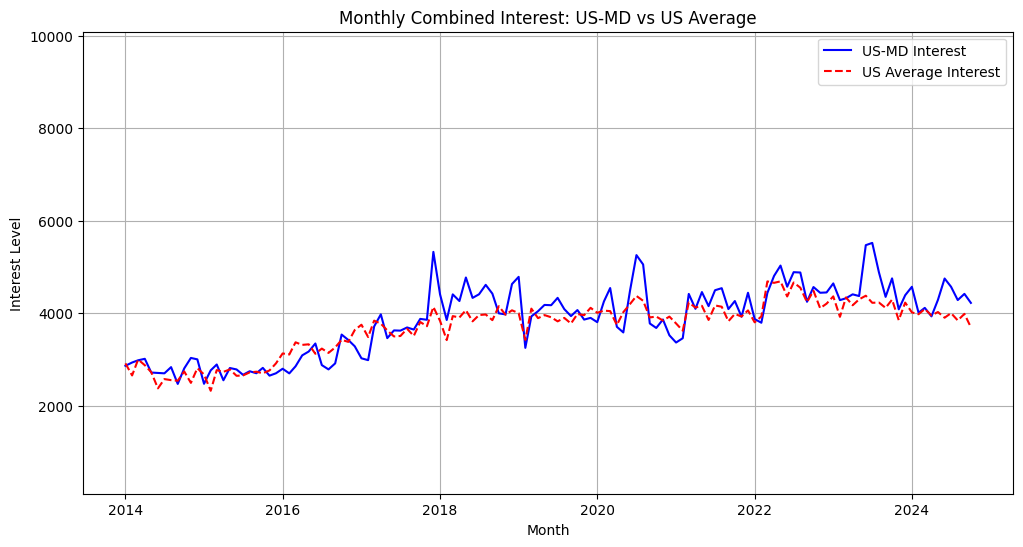

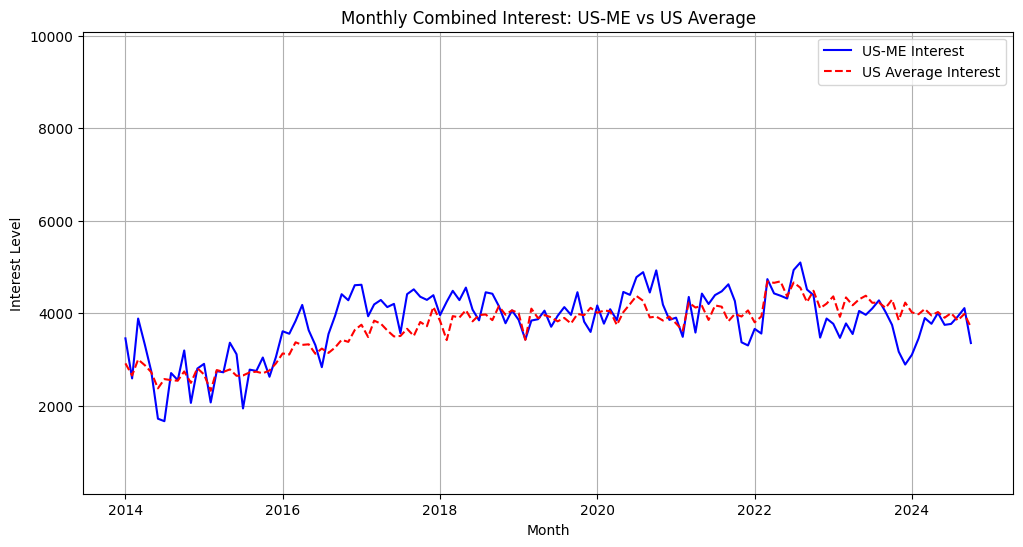

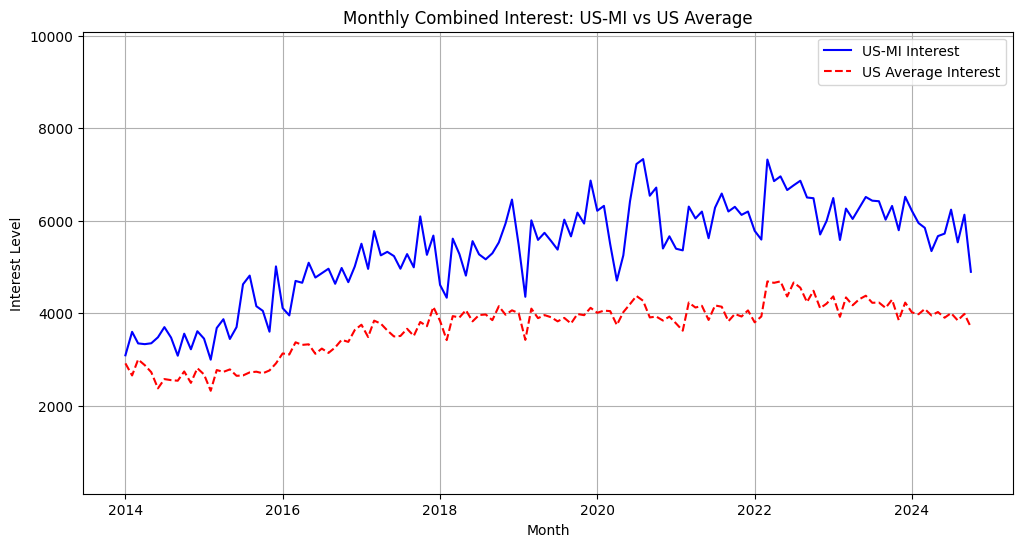

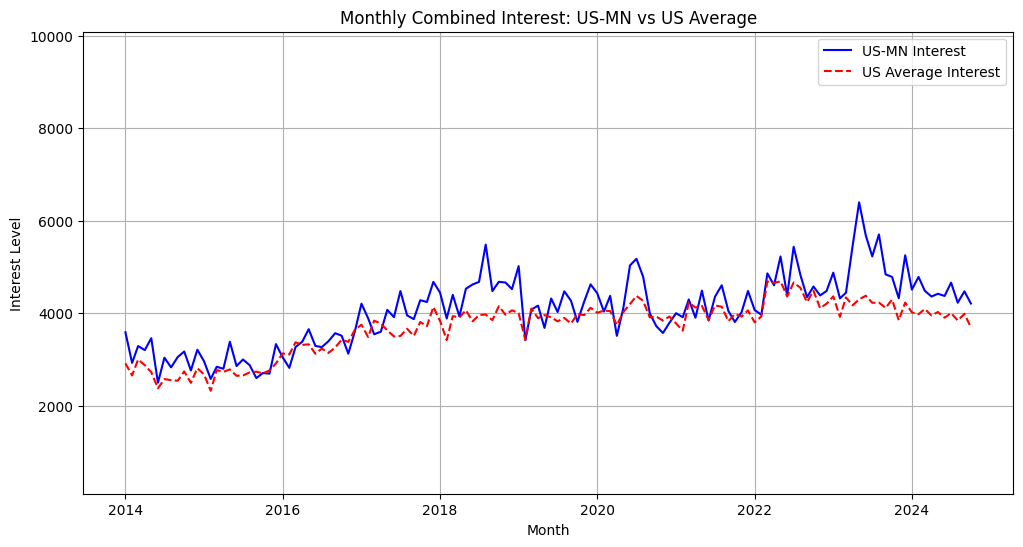

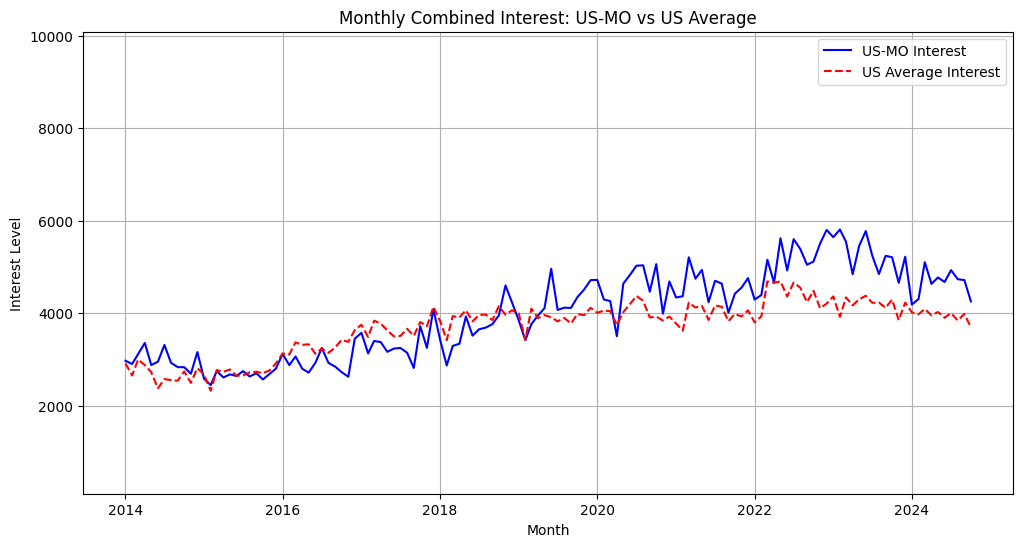

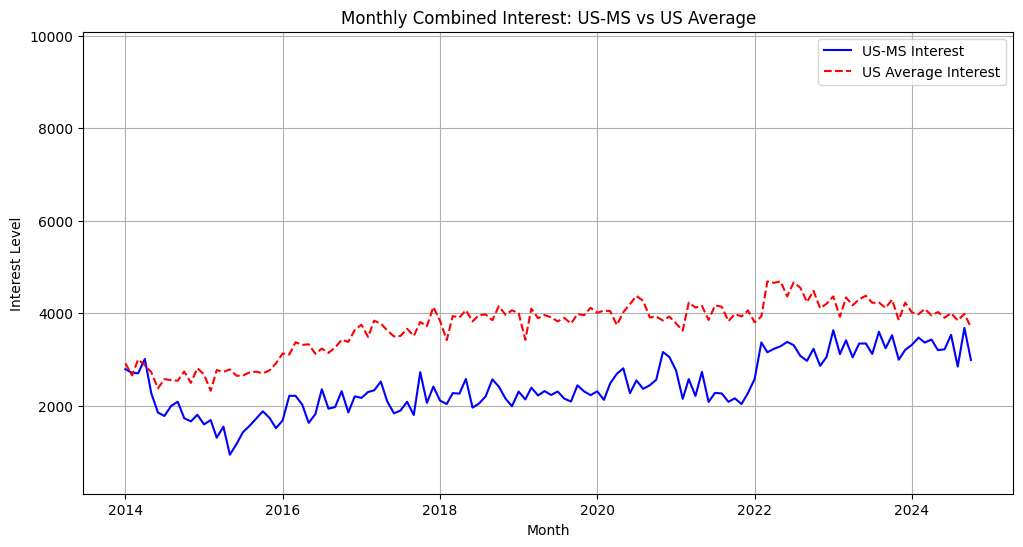

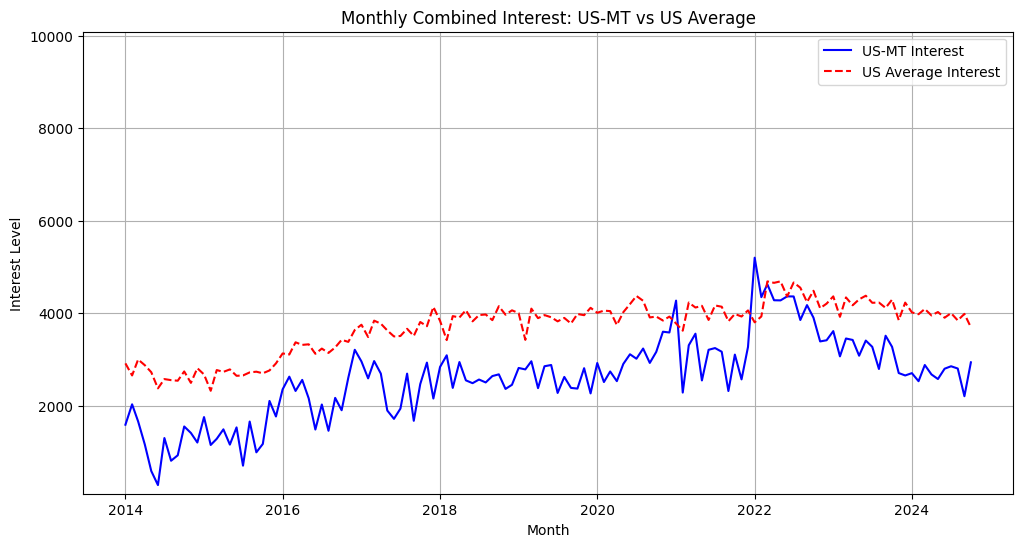

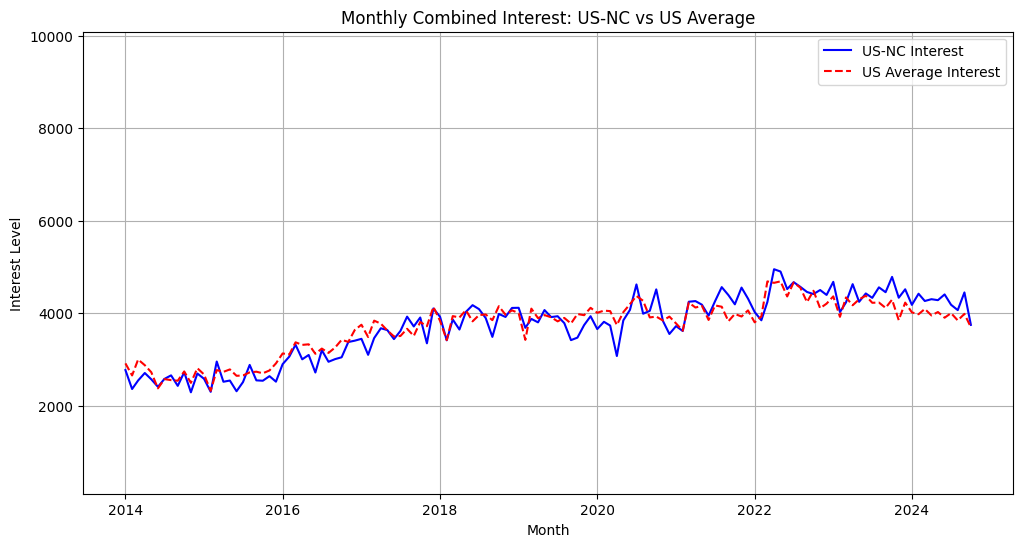

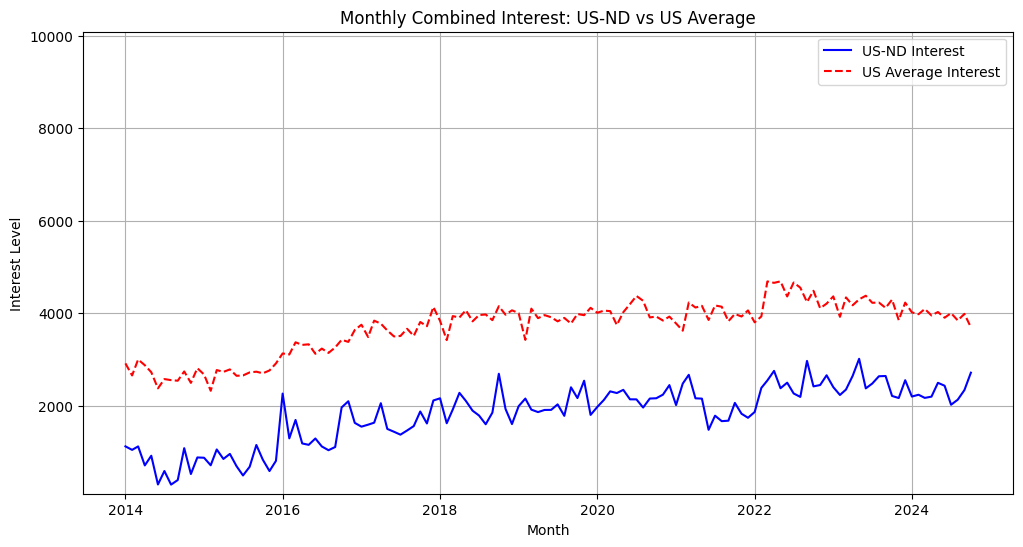

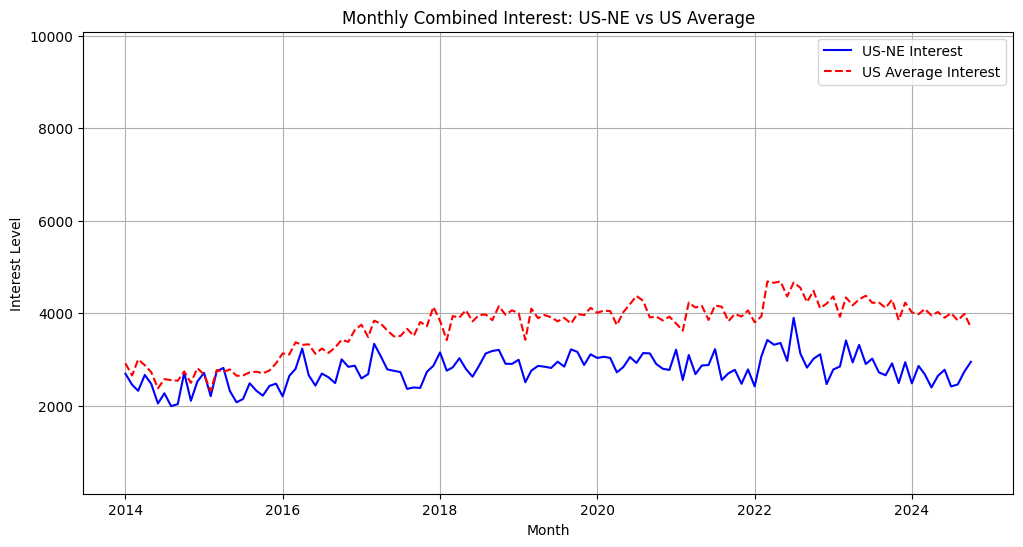

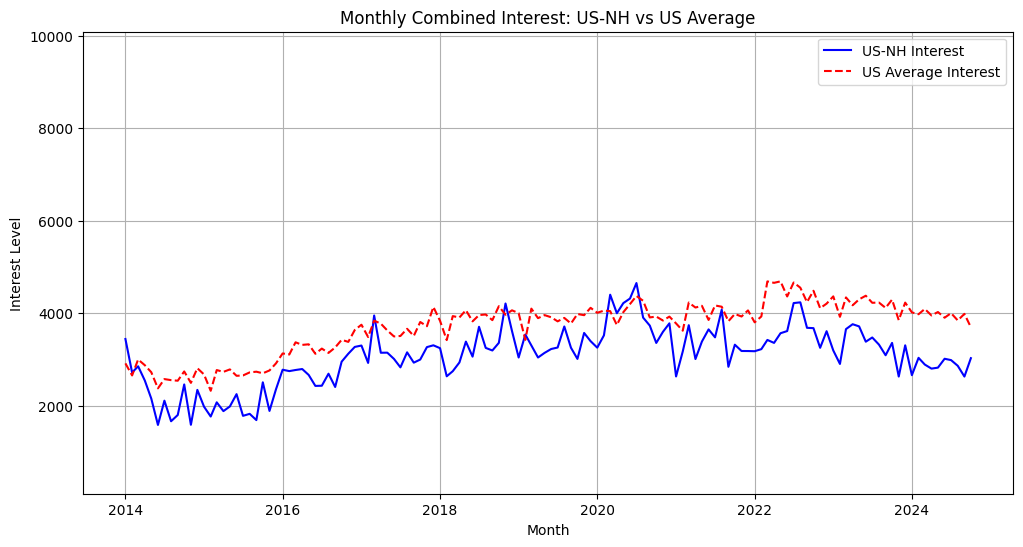

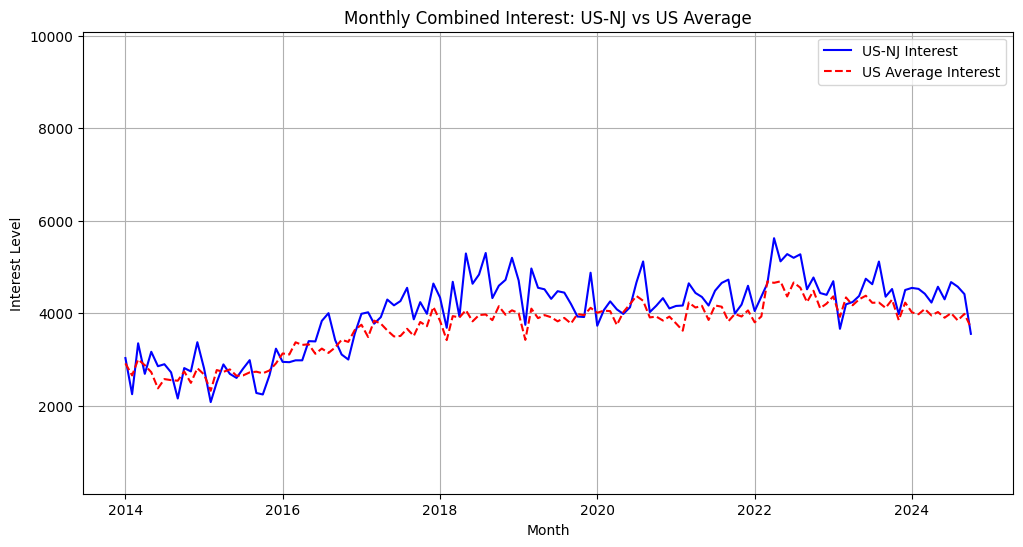

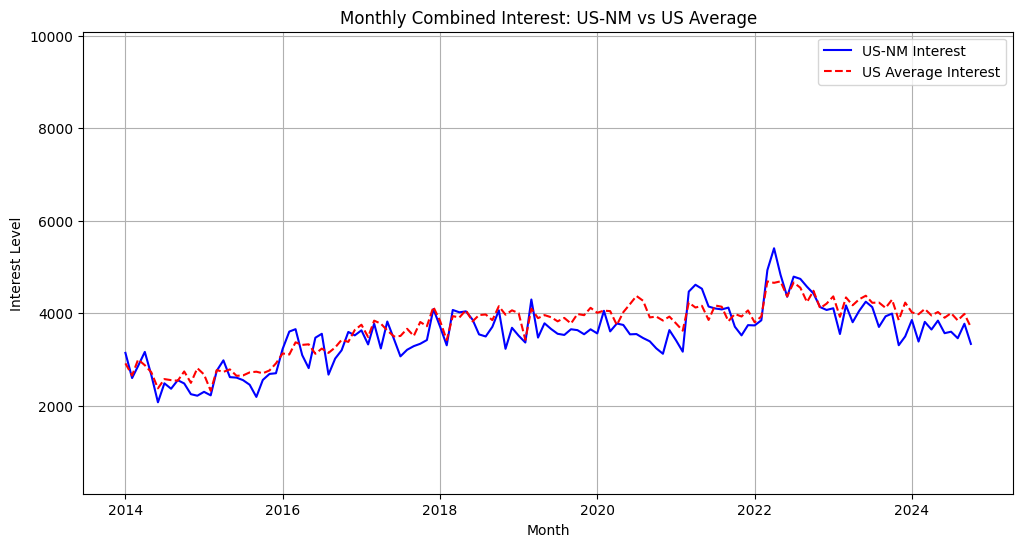

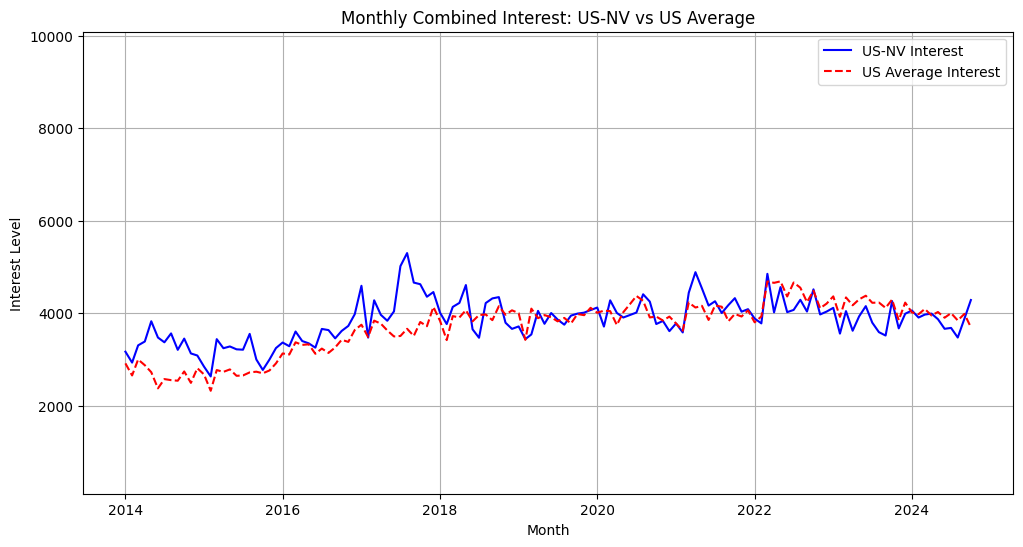

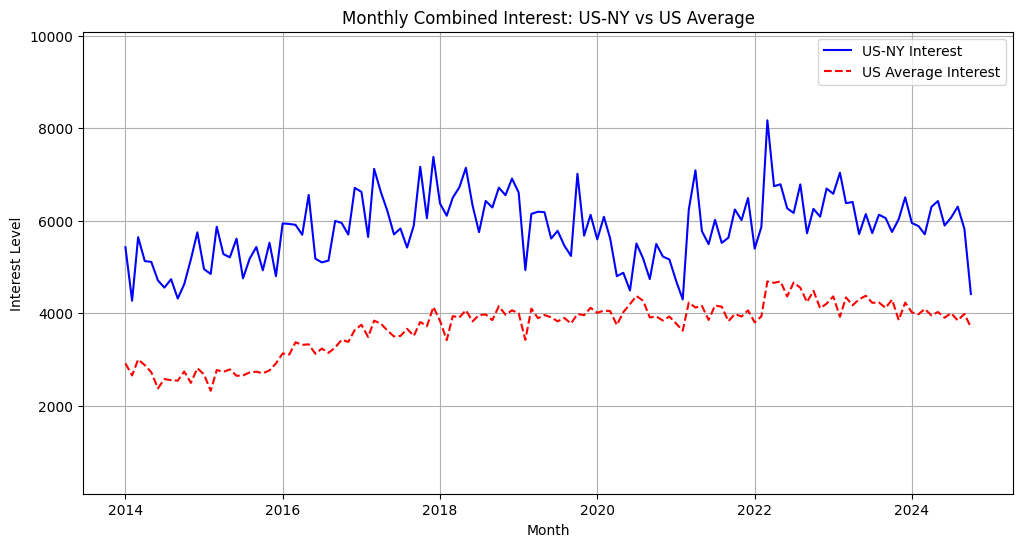

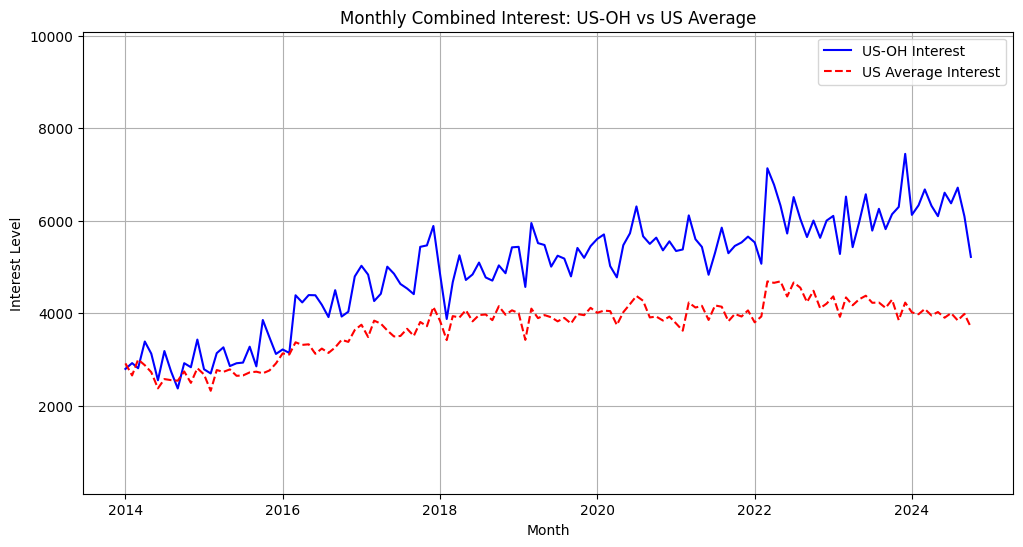

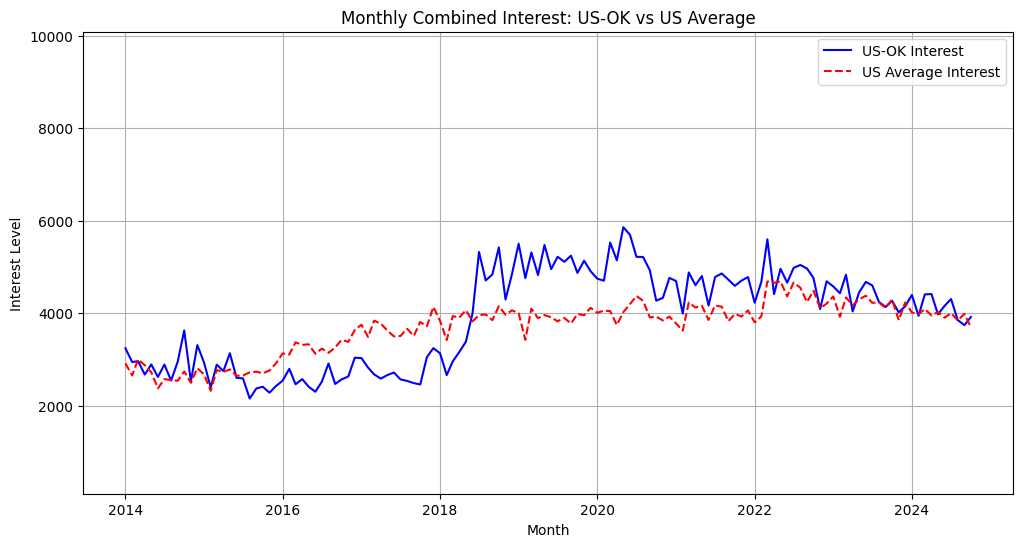

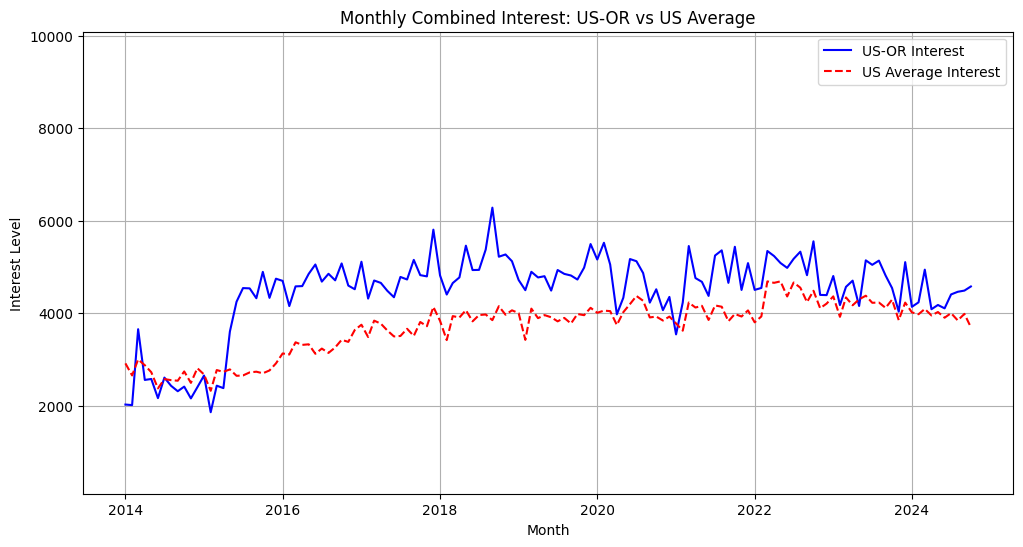

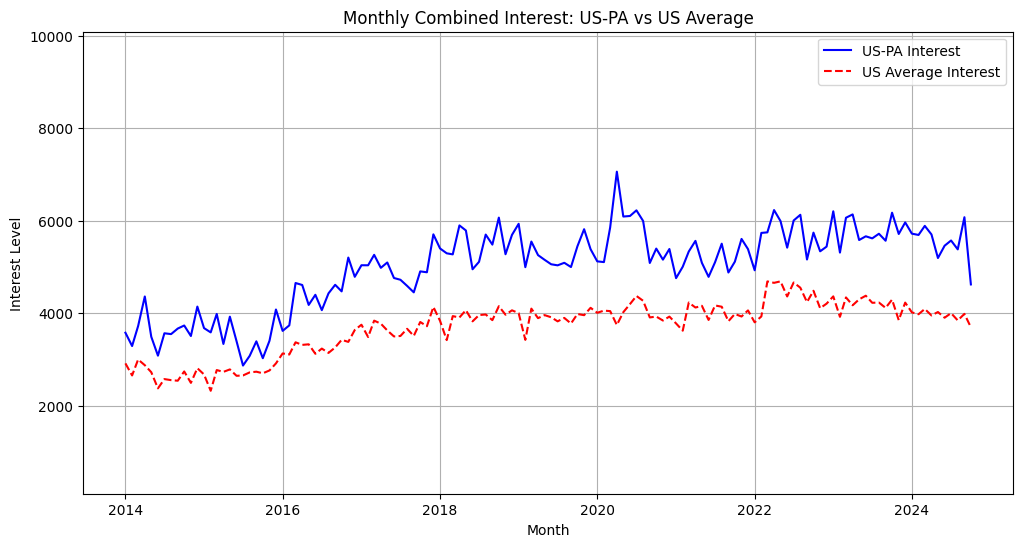

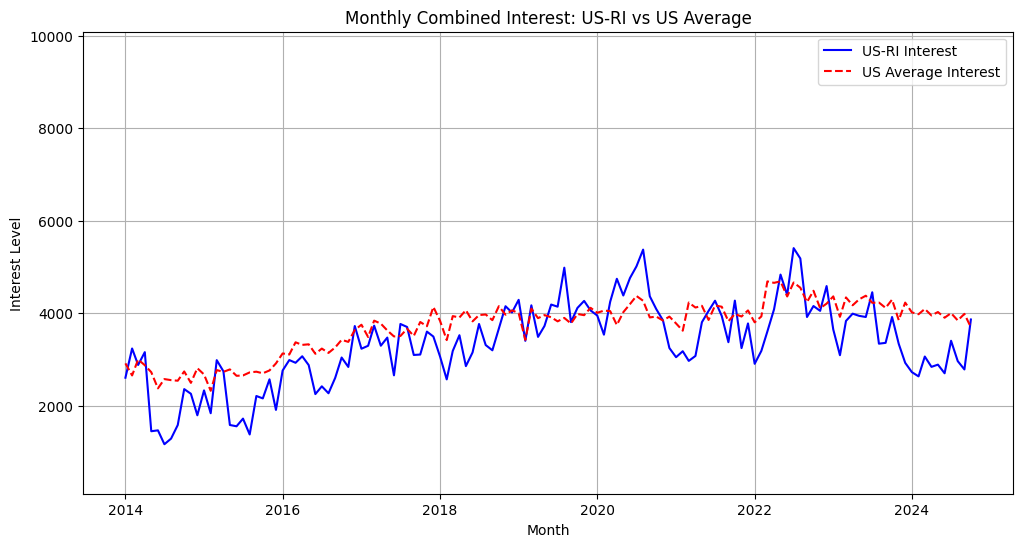

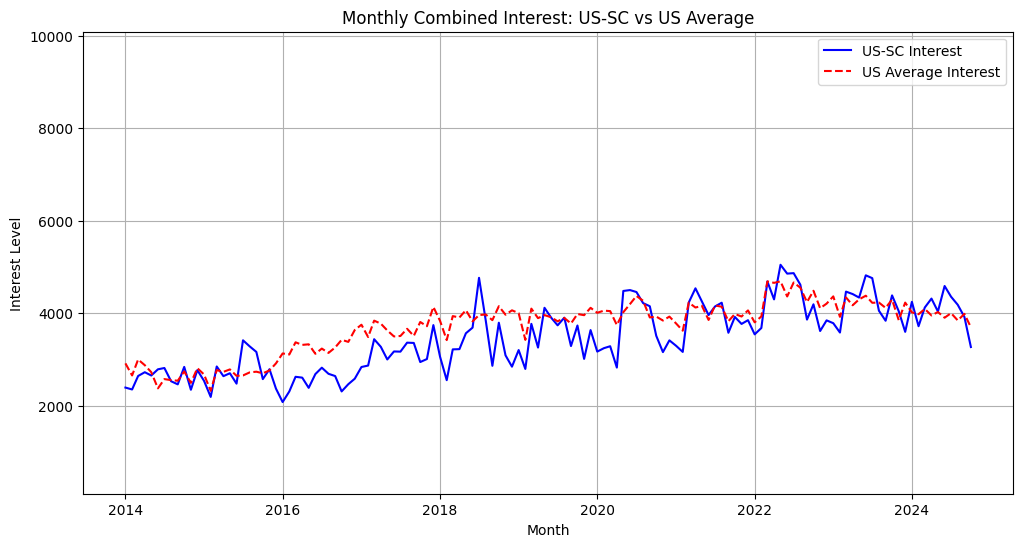

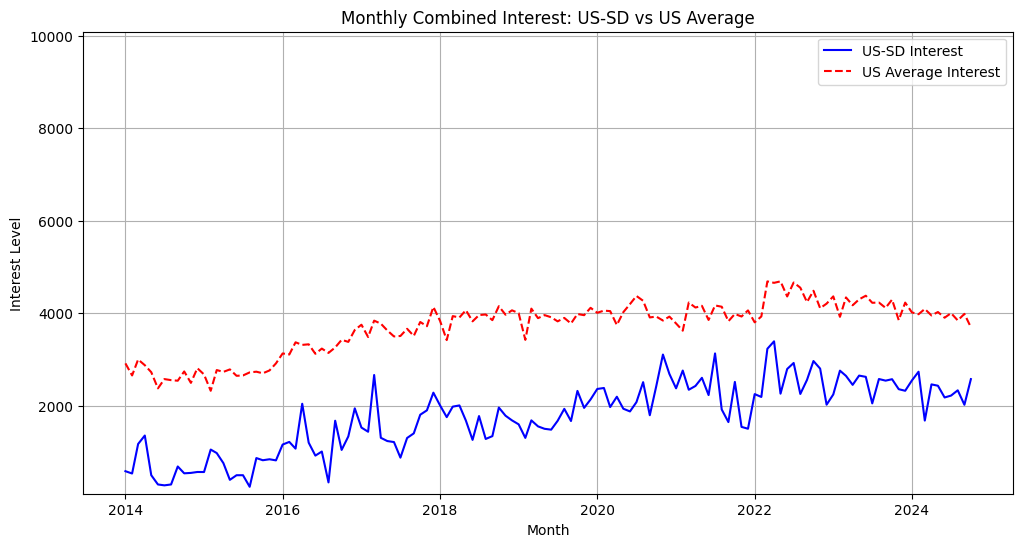

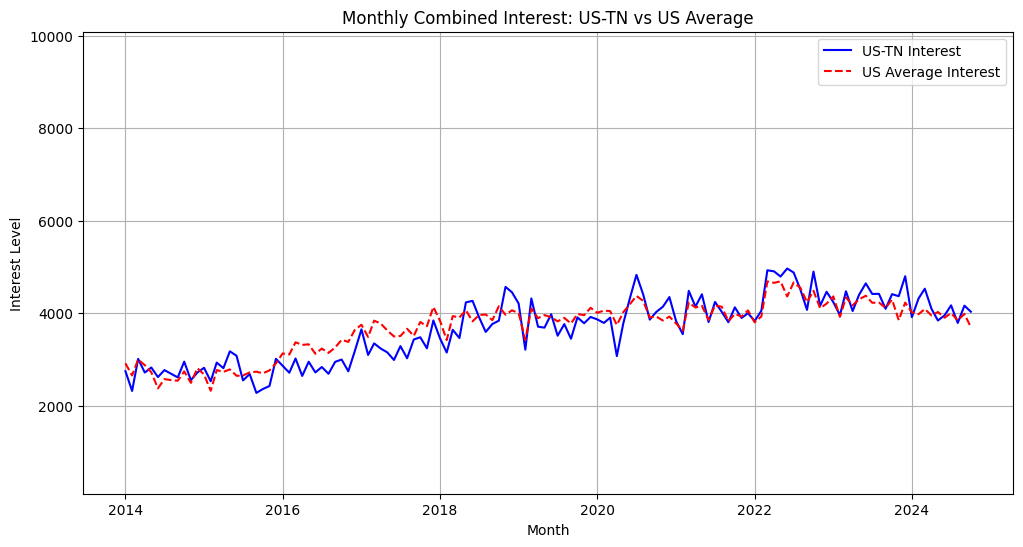

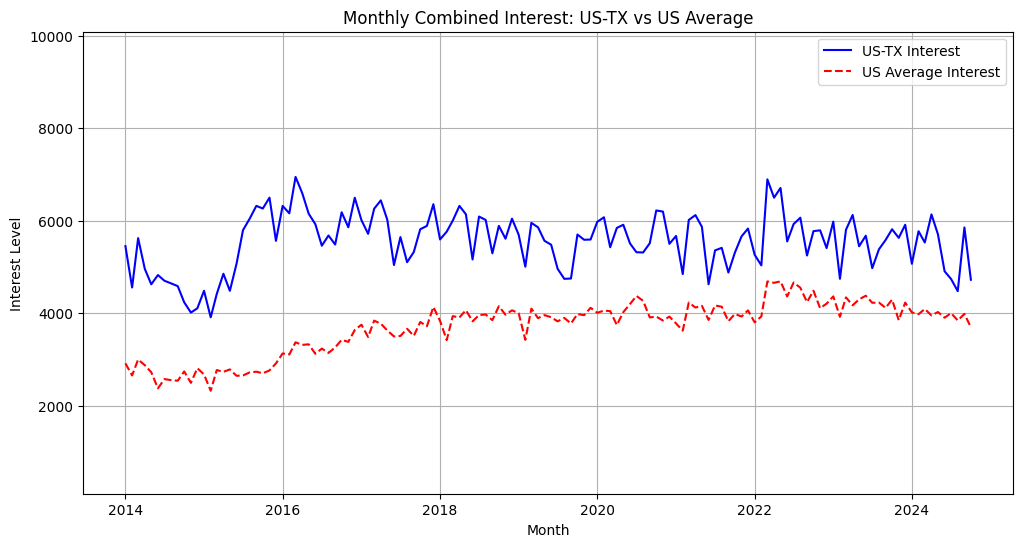

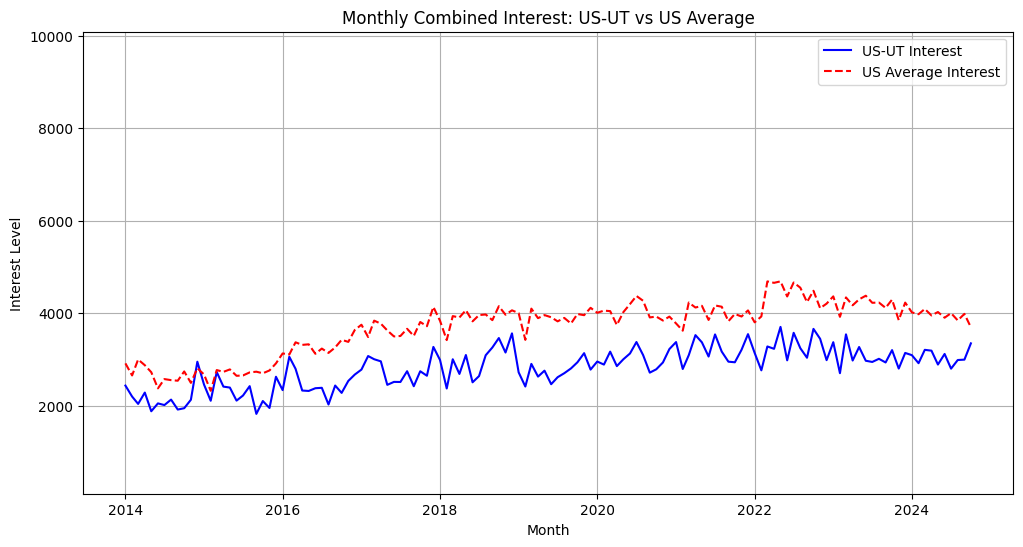

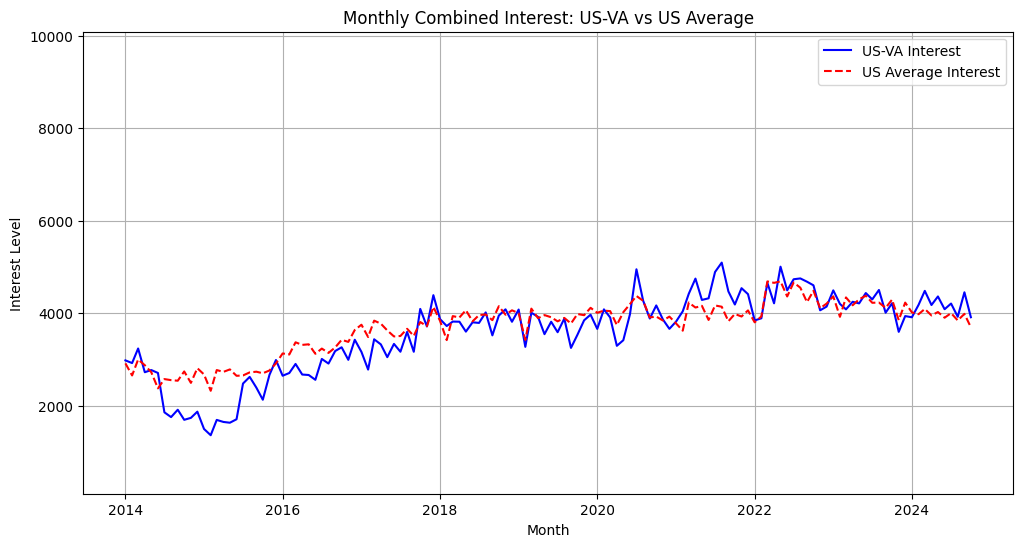

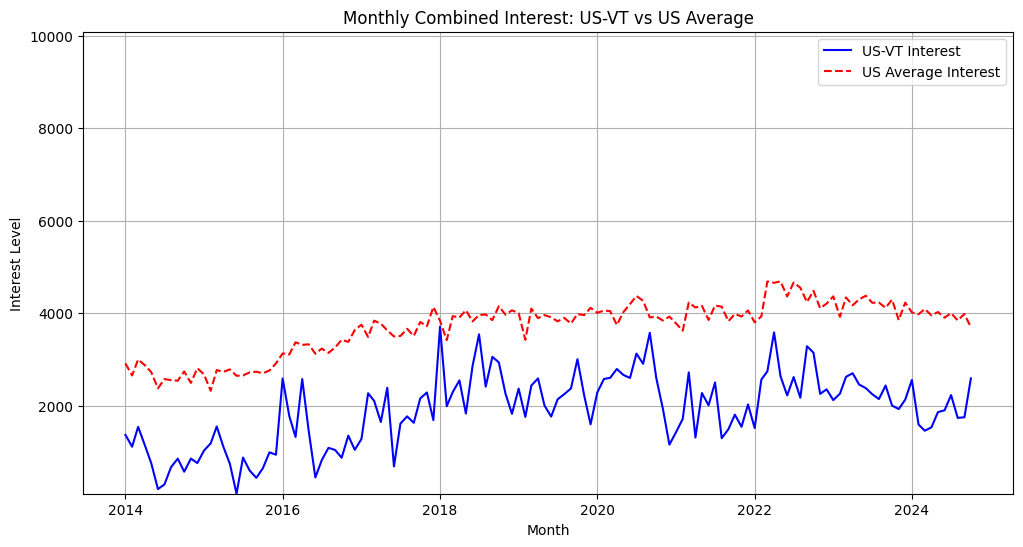

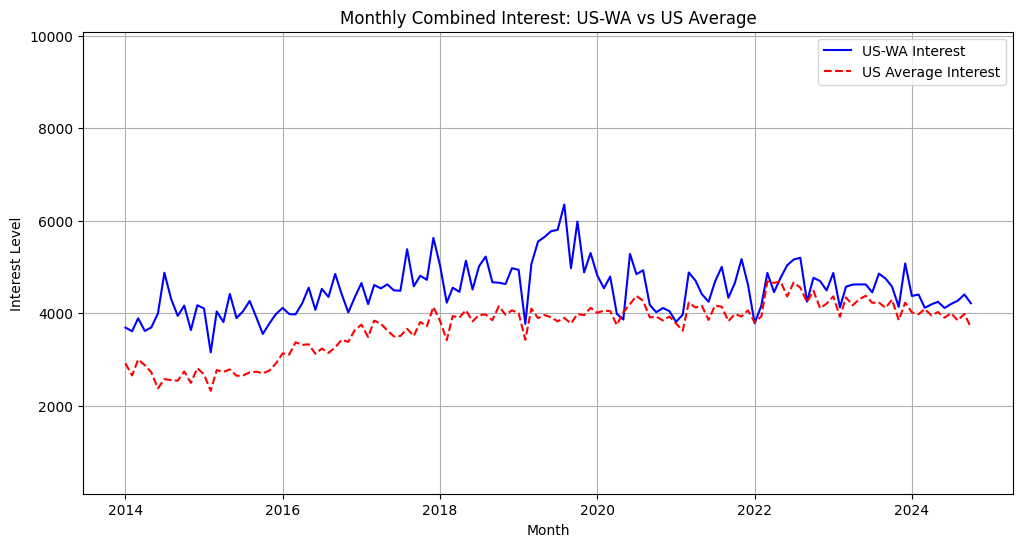

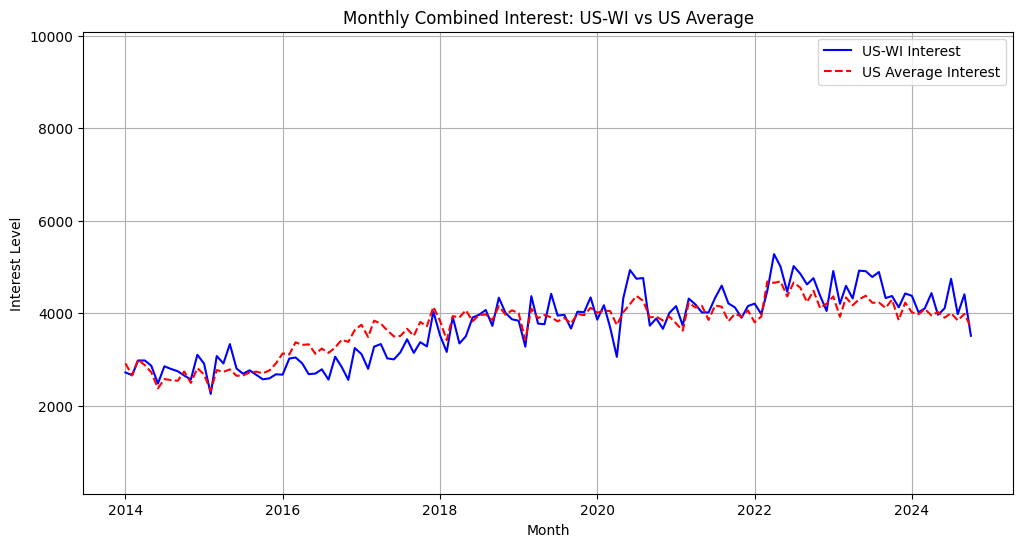

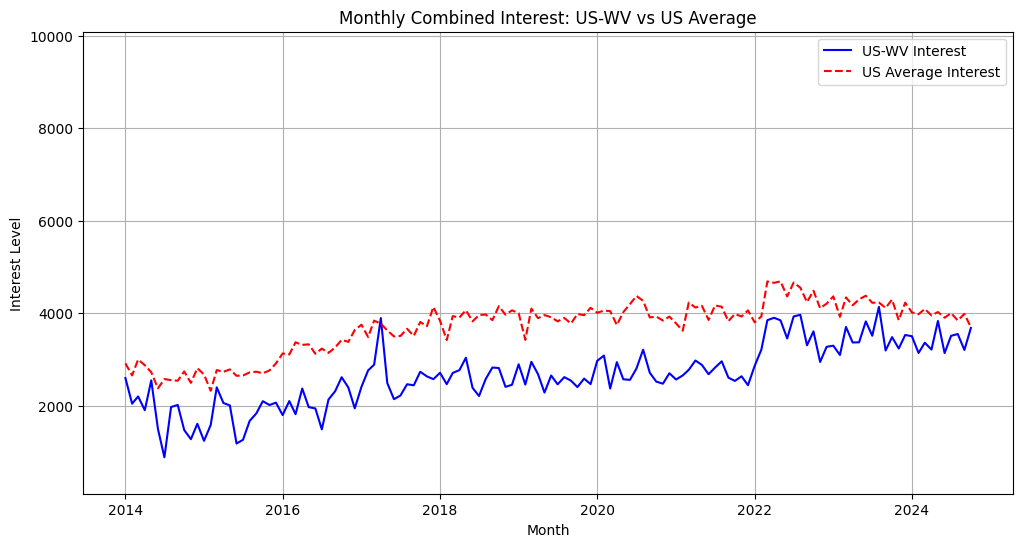

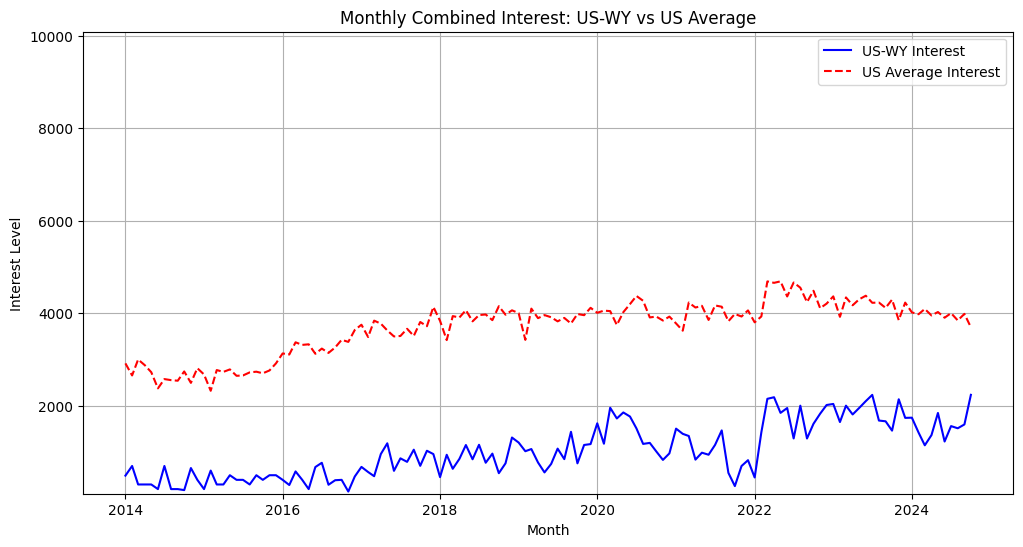

In [6]:
import matplotlib.pyplot as plt

# sum interest for each state
combined_grouped = combined_df.groupby(['region_code', 'month'])['value'].sum().reset_index()

# calculate the us average per month
us_average = combined_grouped.groupby('month')['value'].mean().reset_index()
us_average.rename(columns={'value': 'US Average Interest'}, inplace=True)

# fix y min and max to be the min and max of us interest
y_min = min(combined_grouped['value'].min(), us_average['US Average Interest'].min())
y_max = max(combined_grouped['value'].max(), us_average['US Average Interest'].max())

# Plot for each state with the US average
states = combined_grouped['region_code'].unique()

for state in states:
    state_data = combined_grouped[combined_grouped['region_code'] == state]
    plt.figure(figsize=(12, 6))
    plt.plot(state_data['month'].dt.to_timestamp(), state_data['value'], label=f"{state} Interest", color='blue')
    plt.plot(us_average['month'].dt.to_timestamp(), us_average['US Average Interest'], label='US Average Interest', color='red', linestyle='dashed')

    # Set fixed y-axis range for consistency
    plt.ylim(y_min, y_max)

    # Add titles and labels
    plt.title(f"Monthly Combined Interest: {state} vs US Average")
    plt.xlabel('Month')
    plt.ylabel('Interest Level')
    plt.legend()
    plt.grid()
    plt.show()
